#MP Neuron Model

$y = 1, \mbox{if} \sum_i x_i >= b$



$y =  0, \mbox{otherwise}$

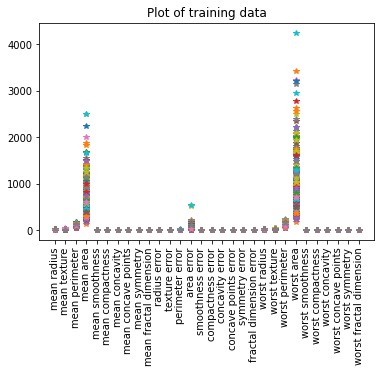

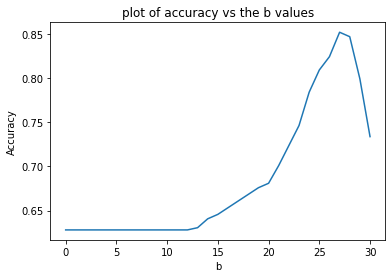

Optimal value of b is 27
Highest accuracy is 0.8517587939698492
Accuracy of test data is 0.8947368421052632


In [ ]:
#importing the libraries
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#Loading the dataset
breast_cancer = sklearn.datasets.load_breast_cancer()

X = breast_cancer.data   #input data
Y = breast_cancer.target #classes corresponding to the data

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) #Converting the data into pandas dataframe
data['class'] = breast_cancer.target                                         #formation of class column

#Splitting of data
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
Y = data['class']  #separating class from the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1) #splitting the data into 70% train and 30% test data maintaining ts reproducibility

X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0]) #binarisation of the trining data

X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0]) #binarisation of the test data

#
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.title("Plot of training data")
plt.show()

# MP Neuron class
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    acc=[]
    B=[]

    #iterating over values of b
    for b in range(X.shape[1] + 1):
      self.b = b #keeping the value b in self variable
      Y_pred = self.predict(X) #predicting the output for particular b
      accuracy[b] = accuracy_score(Y_pred, Y) #accuracy dictionary
      acc.append(accuracy[b])
      B.append(b)
      
    plt.plot(B,acc)
    plt.xlabel("b")
    plt.ylabel("Accuracy")
    plt.title("plot of accuracy vs the b values")
    plt.show()
    best_b = max(accuracy, key = accuracy.get) #getting value of b for maximum accuracy from accuracy dictionary
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

mp_neuron = MPNeuron()  #class instance
mp_neuron.fit(X_binarised_train, Y_train) #fiting the model for training data
Y_test_pred = mp_neuron.predict(X_binarised_test) #predicting the output for testing data

accuracy_test = accuracy_score(Y_test_pred, Y_test)

print("Accuracy of test data is",accuracy_test)